# Content

>[Content](#scrollTo=C4CO23nZcDco)

>[Task](#scrollTo=N9pMAQhcb6e4)

>[Additional links](#scrollTo=D4e7Rt21b-qY)

>[I Libraries and Functions](#scrollTo=Y51wUnRCIaqP)

>>[1 Importing libraries](#scrollTo=3Hi7SeJvcR1r)

>>[2 Definition of functions](#scrollTo=_WTV_ixCf2uc)

>[II Preporation Data](#scrollTo=4sqiHZrVIuWA)

>>[3 Load datasets](#scrollTo=t5PkTAXj7afY)

>>[4 Split dataset on train and test data](#scrollTo=mTbSMzHFTy02)

>>>[4.1 Review target value](#scrollTo=hMsLdopvUnpX)

>>[5 Definition of list features](#scrollTo=mT4AVQqgxiDS)

>>[6 Transformation of features](#scrollTo=U-dZe9m6KLwF)

>>>[6.1 Union all transformers](#scrollTo=3uij-E39M2h3)

>[III LogReg](#scrollTo=yufS6F3-H24E)

>>[7 Build LogReg model](#scrollTo=mNiIH8AGNtXZ)

>>[8 Calculation of metrics](#scrollTo=MrUCoIwuPvZh)

>>[9 Make a confusion matrix](#scrollTo=Y6-_YIK9Sc8S)

>>[10 Calculate the TPR and FPR](#scrollTo=FiaIas1hS38A)

>>[11 Cost estimation](#scrollTo=kswt7phzWwJU)

>>[12 Definition of best cost](#scrollTo=EjqrgZWdY3W_)

>[IV XGBoost](#scrollTo=GN8x27k7H_ce)

>>[13 Build XGBC model](#scrollTo=fYjBfxURaarq)

>>[14 Calculation of metrics](#scrollTo=oUFV9DbXDloN)

>>[15 Make a confusion matrix](#scrollTo=OZLs6Y-RLmPc)

>>[16 Calculate the TPR and FPR](#scrollTo=c_XY-gFVLn5l)

>>[17 Cost estimation](#scrollTo=_hT5aeZgGnBx)

>>[18 Definition of best cost](#scrollTo=HQa5TSGlGu9G)

>[V CatBoost](#scrollTo=8Hs-ESEuG2XC)

>>[19 Build CatBoost model](#scrollTo=QqN9hXYe-hCa)

>>[20 Calculation of metrics](#scrollTo=03Z-M4_9-QWd)

>>[21 Make a confusion matrix](#scrollTo=7LxZMpxa-rxz)

>>[22 Calculate the TPR and FPR](#scrollTo=x06DTP8M-vQ9)

>>[23 Cost estimation](#scrollTo=LHjajZ_Y-4GT)

>>[24 Definition of best cost](#scrollTo=tspI1pf9-_kP)

>[VI RandomForests](#scrollTo=ffSYYajfAraM)

>>[25 Build Forest model](#scrollTo=r5o90VfdGIAP)

>>[26 Calculation of metrics](#scrollTo=CBh2-sE4GLlG)

>>[27 Make a confusion matrix](#scrollTo=Jaq4VfDtGN8o)

>>[28 Calculate the TPR and FPR](#scrollTo=wRginhejGQHu)

>>[29 Cost estimation](#scrollTo=6ArWdF_DGSDD)

>>[30 Definition of best cost](#scrollTo=36IE_VY2GUF-)

>[Definition best model](#scrollTo=MsiWNZhaYoyJ)

>[Conclusion](#scrollTo=T1Ntmeg9YvOY)



# Task

1. Обучить несколько разных моделей на наборе данных ССЗ (train_case2.csv): логрег, бустинг, лес и т.д - на ваш выбор 2-3 варианта
2. Вывести сравнение полученных моделей по основным метрикам классификации: pr/rec/auc/f_score (можно в виде таблицы, где строки - модели, а столбцы - метрики)
3. Вывести сравнение полученных моделей по метрикам бизнеса по показателям с урока
    - стоимость лечения 15000р, если сделали тест и начали лечить вовремя
    - стоимость лечения 20000р, если упустили и начали лечить когда уже проявились все симптомы
    - стоимость теста 1400р
4. Сделать выводы о том, какая модель справилась с задачей лучше других
5. *Найти порог классификации по деньгам для лучшей модели
    - Стоимость лечения 15000р, если сделали тест и начали лечить вовремя
    - Стоимость лечения 20000р, если упустили и начали лечить когда уже проявились все симптомы
    - Стоимость теста 1400р


Пусть:

- стоимость лечения 15000р, если сделали тест и начали лечить вовремя
- стоимость лечения 20000р, если упустили и начали лечить когда уже проявились все симптомы
- стоимость теста 1400р



- лишних тестов сделали FP = cnf_matrix[0][1]
- пропустили больных FN = cnf_matrix[1][0]
- правильных тестов сделали TP = cnf_matrix[1][1]

# Additional links

1. https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
2. https://en.wikipedia.org/wiki/Receiver_operating_characteristic
3. Метрики для классификации (видео) - https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje
4. Метрики для регрессии (видео) - https://youtu.be/vh2smjQyhp8
5. ROC-AUC (видео) - https://youtu.be/v6PPG8J_Egs

https://scikit-learn.ru/1-10-decision-trees/

# I Libraries and Functions

## 1 Importing libraries

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.4 MB/s eta 0:00:00


In [155]:
import os
import shutil
import time
from google.colab import drive, files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import itertools
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
tqdm.pandas()
import xgboost as xgb, lightgbm as lgbm, catboost as catb
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## 2 Definition of functions

In [209]:
star = lambda x:"\n" + x*50 + "\n"

rubl_test = 1400
rubl_early_treatment = 15000
rubl_late_treatment = 20000

def Mkdir(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]


class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform
    additional transformations on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


class OHEEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key)]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ in self.columns:
                X[col_] = 0
        return X[self.columns]


def build_and_learning_model(transform, model, X_train, X_test, y_train, cv:int, scoring : str):
    model_list = [transform, model]
    M = Pipeline(model_list)
    cv_scores = cross_val_score(M, X_train, y_train, cv=cv, scoring=scoring)
    cv_score_mean = np.mean(cv_scores)
    cv_score_std = np.std(cv_scores)
    print(f'CV score is {cv_score_mean}+-{cv_score_std}')
    M.fit(X_train, y_train)
    y_true_proba = M.predict_proba(X_test)[:,1]
    y_true_predict = M.predict(X_test)
    return M, y_true_proba, y_true_predict


def ROC_AUC_show(y_test, y_true):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds_ = roc_curve(y_test, y_true, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()


def Calc_of_metrics_and_Roc_Auc(model, X_train, X_test, y_train, y_test, y_true_proba, y_true_predict):
    b = 1
    precision, recall, thresholds = precision_recall_curve(y_test, y_true_proba)
    fscore = (1 + b**2) * (precision * recall) / (b**2 * precision + recall)
    ix = np.argmax(fscore)
    if np.isnan(fscore[ix]):
        F1 = f1_score(y_test, y_true_predict)
        closest_value = min(fscore, key=lambda x: abs(F1 - x))
        ix = list(fscore).index(closest_value)
    fpr, tpr, thresholds_ = roc_curve(y_test, y_true_proba, pos_label=1)
    print(f'Best Threshold={thresholds[ix]:.3f}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

    print("\n","*"*50,"\n")
    ROC_AUC_show(y_test, y_true_proba)

    print("\n","*"*50,"\n")
    print(f"ROC_AUC score train: {roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])}")
    print(f"ROC_AUC score test: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")
    metrics_dict = {"Thresholds":thresholds[ix], "F_score": fscore[ix], "Precision":precision[ix], "Recall": recall[ix]}
    return metrics_dict


def TNFP(cnf_matrix):
    TN = cnf_matrix[0][0]
    FN = cnf_matrix[1][0]
    TP = cnf_matrix[1][1]
    FP = cnf_matrix[0][1]

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (FP + TN)
    print(f"TPR = {TPR}", "\n"
        f"FPR = {FPR}", "\n"
        f"TNR = {TNR}")
    tnfp = {"TN": TN, "FN": FN, "TP": TP, "FP": FP}
    return tnfp


def Estimation_cost(cnf_matrix, tnfp_dict):
    rubl_1 = (tnfp_dict["FN"] + tnfp_dict["TP"]) * rubl_late_treatment
    print('Расходы, если не делать тест и ждать симптомов:', rubl_1)
    print(star("*"))
    rubl_test_all = np.sum(cnf_matrix) * rubl_test + (tnfp_dict["FN"] + tnfp_dict["TP"]) * rubl_early_treatment
    print('Расходы, если делать тест всем и лечить группу большых:', rubl_test_all)
    print(star("*"))
    rubl_ML = (tnfp_dict["FP"] + tnfp_dict["TP"]) * rubl_test + tnfp_dict["FN"] * rubl_late_treatment + tnfp_dict["TP"] * rubl_early_treatment
    print('Расходы, если использовать МЛ:', rubl_ML)
    print(star("*"))
    print('Расходы "решение не делать тесты - расходы с МL:"', rubl_1 - rubl_ML)
    print(star("*"))
    print('Расходы "решение не делать тесты - расходы сделать тесты всем":', rubl_1 - rubl_test_all)
    print(star("*"))
    print('Расходы "сделать тесты всем - решение делать тесты ML":', rubl_test_all - rubl_ML)


def business_threshold_calibrate(y_test, y_true, thresholds,
                                 rubl_test=100, rubl_early_treatment=100, rubl_late_treatment=1000):
    business_threshold = 0
    r_test_all_r_ML_ = 0

    rubl_ML_ = 1_000_000_000

    rs = []
    n = 20
    tr_list = np.linspace(0, 1, n).tolist()
    for opt_buisness_tr in tr_list:
        # подберем порог для улучшения бизнесс показателя

        cnf_matrix = confusion_matrix(y_test, y_true > (opt_buisness_tr))
        TN = cnf_matrix[0][0]
        FN = cnf_matrix[1][0]
        TP = cnf_matrix[1][1]
        FP = cnf_matrix[0][1]

        rubl_ML = (TP + FP) * rubl_test + FN * rubl_late_treatment + TP * rubl_early_treatment

        if rubl_ML < rubl_ML_:
            business_threshold = opt_buisness_tr

            rubl_ML_ = rubl_ML

        rs.append(rubl_ML)

    print('расходы, если использовать МЛ:', rubl_ML_)
    print(star("*"))

    plt.title('Потери при МЛ решении')
    plt.xlabel('Отсечка')
    plt.ylabel('Потери')
    plt.plot(np.linspace(0,1,n), rs)
    plt.show()
    busines_cost = rs[tr_list.index(business_threshold)]
    return business_threshold, busines_cost

# II Preporation Data

## 3 Load datasets

In [4]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
path_to_work_dir = "/content/drive/MyDrive/HW3_MOB/"

In [6]:
# Mkdir(path_to_work_dir)

In [7]:
# !wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O "/content/drive/MyDrive/HW3_MOB/train_case2.csv"

In [8]:
df = pd.read_csv(path_to_work_dir + "train_case2.csv", sep=";")
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 4 Split dataset on train and test data

### 4.1 Review target value

In [9]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="cardio"),
                                                    df['cardio'], random_state=13)

## 5 Definition of list features

In [11]:
continuos_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cat_cols = ['gender', 'cholesterol']
base_cols = ['gluc', 'smoke', 'alco', 'active']

## 6 Transformation of features

In [12]:
continuos_transformers = []
cat_transformers = []
base_transformers = []

for cont_col in continuos_cols:
    transformer = Pipeline([("selector", NumberSelector(key=cont_col)),
                            ("standart", StandardScaler())])
    continuos_transformers.append((cont_col, transformer))

for cat_col in cat_cols:
    cat_transformer = Pipeline([("selector", ColumnSelector(key=cat_col)),
                                ("ohe", OHEEncoder(key=cat_col))])
    cat_transformers.append((cat_col, cat_transformer))

for base_col in base_cols:
    base_transformer = Pipeline([("selector", NumberSelector(key=base_col))])
    base_transformers.append((base_col, base_transformer))


### 6.1 Union all transformers

In [13]:
feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)

# III LogReg

## 7 Build LogReg model

In [169]:
model_logreg, y_score_prob_logreg, y_score_pred_logreg = build_and_learning_model(('features', feats), ('classifier', LogisticRegression(random_state=42)), X_train, X_test, y_train, 5, "roc_auc")

CV score is 0.7758517154362201+-0.0016467361187090693


## 8 Calculation of metrics

Best Threshold=0.398, F-Score=0.725, Precision=0.634, Recall=0.846

 ************************************************** 



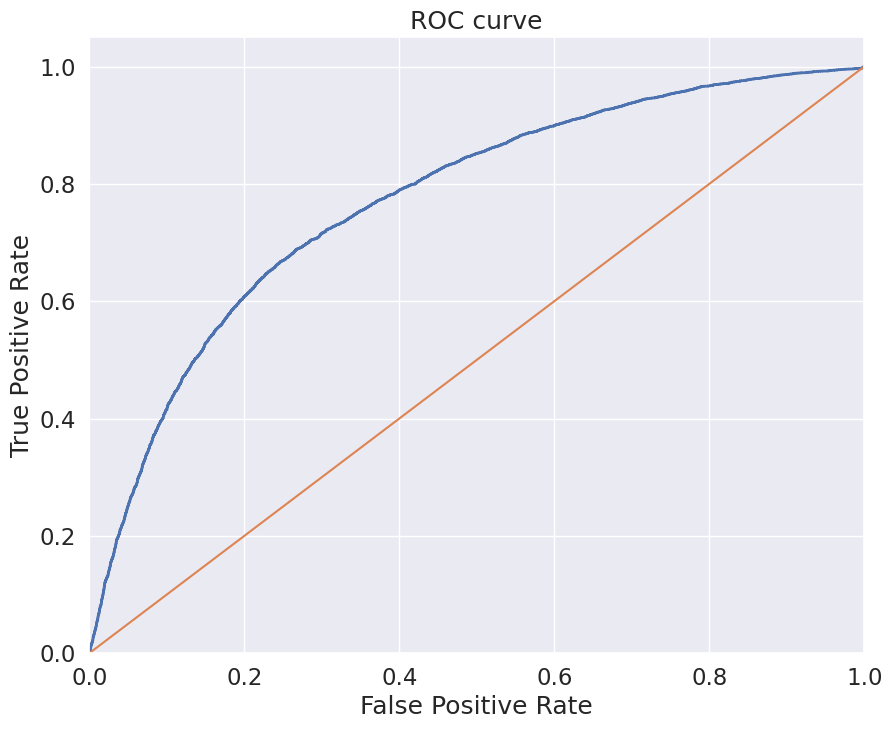


 ************************************************** 

ROC_AUC score train: 0.7763733348459587
ROC_AUC score test: 0.7718250028107827


In [170]:
logreg_metrics = Calc_of_metrics_and_Roc_Auc(model_logreg, X_train, X_test, y_train, y_test, y_score_prob_logreg, y_score_pred_logreg)

## 9 Make a confusion matrix

Confusion matrix, without normalization
[[4495 4269]
 [1344 7392]]


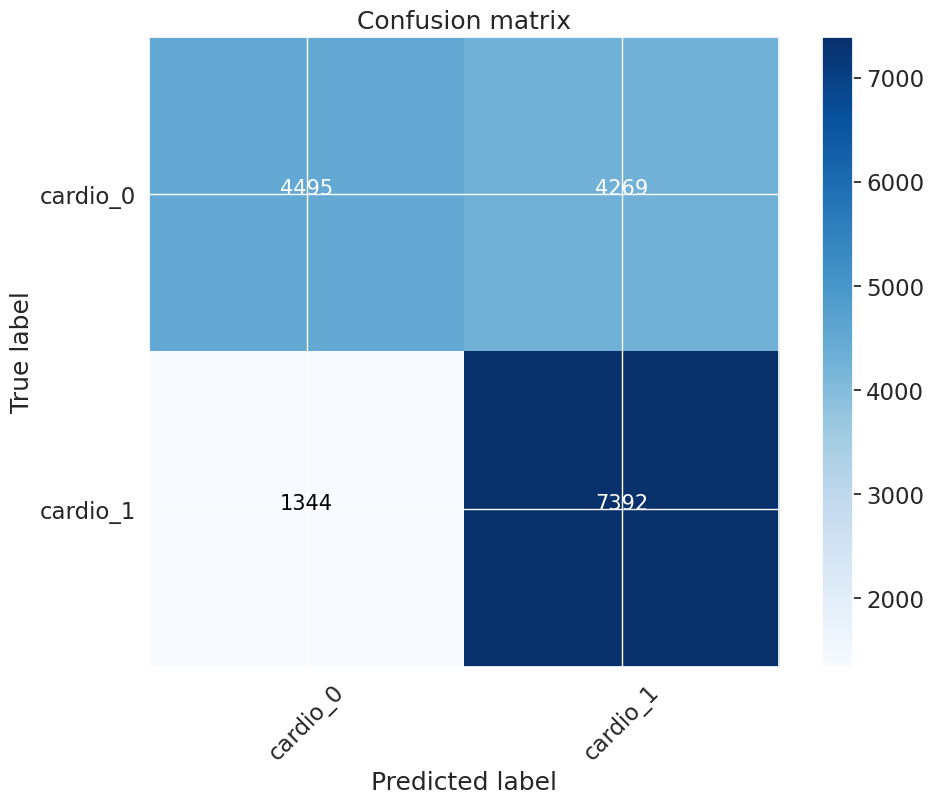

In [171]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_logreg = confusion_matrix(y_test, y_score_prob_logreg > logreg_metrics['Thresholds'])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_logreg, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

## 10 Calculate the TPR and FPR

In [172]:
tnfp_dict_logreg = TNFP(cnf_matrix_logreg)

TPR = 0.8461538461538461 
FPR = 0.4871063441350981 
TNR = 0.5128936558649019


## 11 Cost estimation

In [173]:
Estimation_cost(cnf_matrix_logreg, tnfp_dict_logreg)

Расходы, если не делать тест и ждать симптомов: 174720000

**************************************************

Расходы, если делать тест всем и лечить группу большых: 155540000

**************************************************

Расходы, если использовать МЛ: 154085400

**************************************************

Расходы "решение не делать тесты - расходы с МL:" 20634600

**************************************************

Расходы "решение не делать тесты - расходы сделать тесты всем": 19180000

**************************************************

Расходы "сделать тесты всем - решение делать тесты ML": 1454600


## 12 Definition of best cost

расходы, если использовать МЛ: 153787600

**************************************************



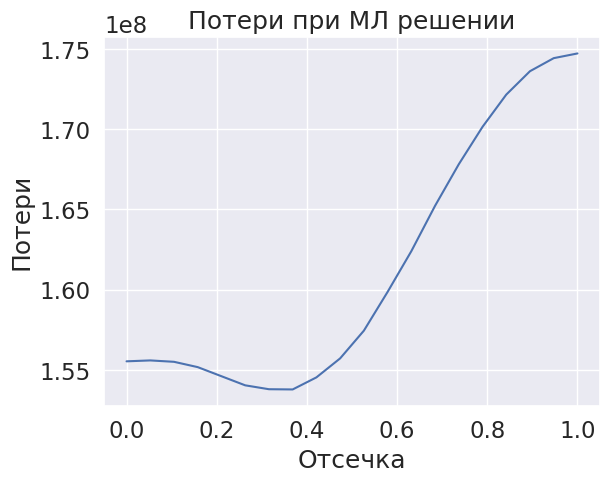


**************************************************

уровень порога по бизнес метрике 0.3684210526315789
уровень порога по f1 метрике 0.39764739078707884


In [210]:
busines_tr_logreg, cost_logreg = business_threshold_calibrate(y_test, y_score_prob_logreg,
                                          logreg_metrics['Thresholds'],
                                          rubl_test=1400,
                                          rubl_early_treatment=15000,
                                          rubl_late_treatment=20000)

print(star("*"))
print('уровень порога по бизнес метрике', busines_tr_logreg)
print('уровень порога по f1 метрике', logreg_metrics['Thresholds'])

# IV XGBoost

## 13 Build XGBC model

In [175]:
model_xgb, y_score_prob_xgb, y_score_pred_xgb = build_and_learning_model(('features', feats), ("XGB", xgb.XGBClassifier(random_state=42)), X_train, X_test, y_train, 5, "roc_auc")

CV score is 0.7867120954788023+-0.001900270093241665


## 14 Calculation of metrics



Best Threshold=0.500, F-Score=0.712, Precision=0.739, Recall=0.687

 ************************************************** 



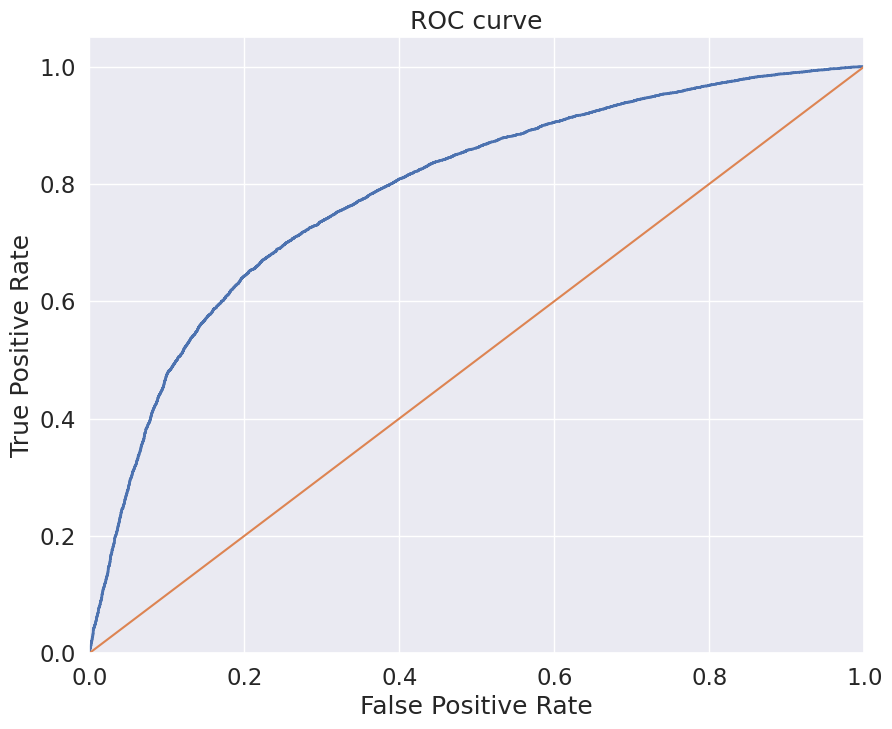


 ************************************************** 

ROC_AUC score train: 0.8371112330426492
ROC_AUC score test: 0.7866404072688303


In [176]:
xgb_metrics = Calc_of_metrics_and_Roc_Auc(model_xgb, X_train, X_test, y_train, y_test, y_score_prob_xgb, y_score_pred_xgb)

## 15 Make a confusion matrix

Confusion matrix, without normalization
[[6649 2115]
 [2738 5998]]


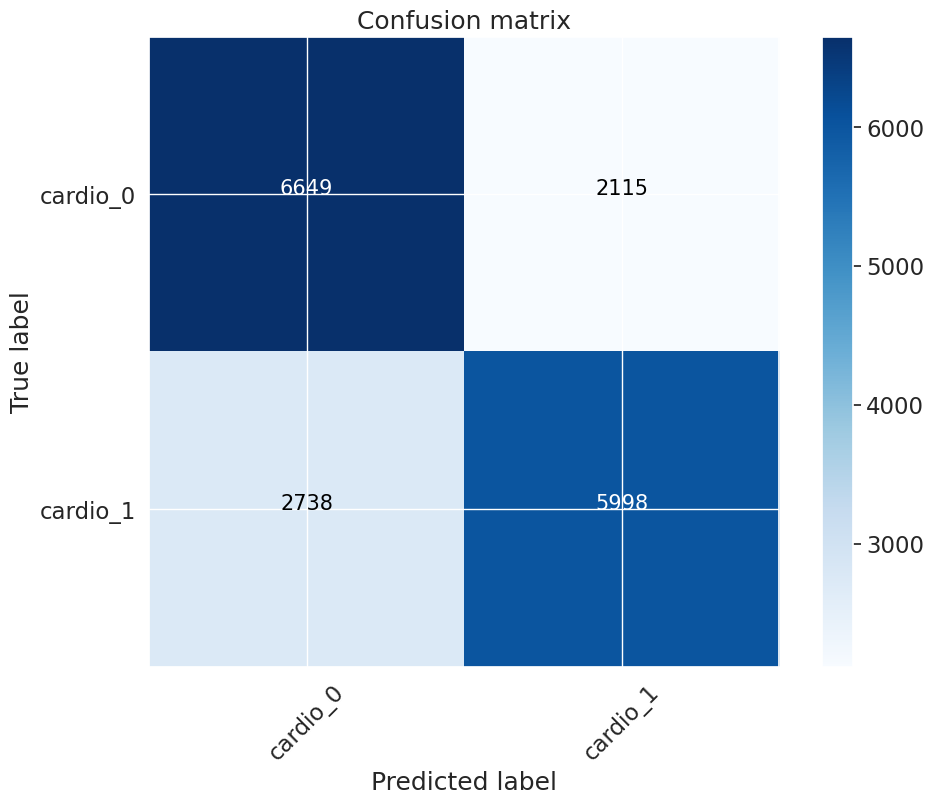

In [177]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_xgb = confusion_matrix(y_test, y_score_prob_xgb > xgb_metrics['Thresholds'])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_xgb, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

## 16 Calculate the TPR and FPR

In [178]:
tnfp_dict_xgb = TNFP(cnf_matrix_xgb)

TPR = 0.6865842490842491 
FPR = 0.24132816065723414 
TNR = 0.7586718393427658


## 17 Cost estimation

In [179]:
Estimation_cost(cnf_matrix_xgb, tnfp_dict_xgb)

Расходы, если не делать тест и ждать симптомов: 174720000

**************************************************

Расходы, если делать тест всем и лечить группу большых: 155540000

**************************************************

Расходы, если использовать МЛ: 156088200

**************************************************

Расходы "решение не делать тесты - расходы с МL:" 18631800

**************************************************

Расходы "решение не делать тесты - расходы сделать тесты всем": 19180000

**************************************************

Расходы "сделать тесты всем - решение делать тесты ML": -548200


## 18 Definition of best cost

расходы, если использовать МЛ: 153635400

**************************************************



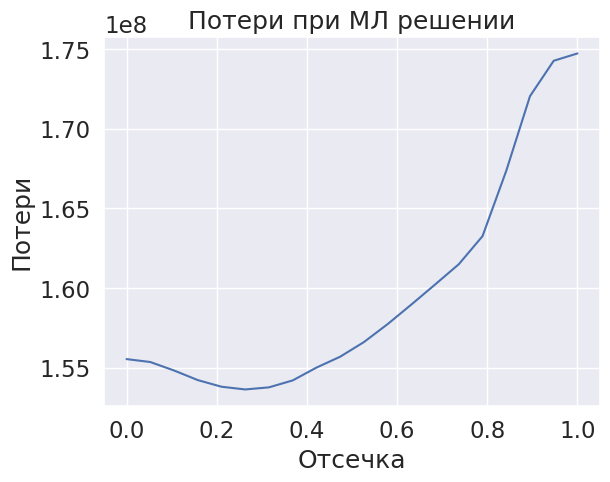


**************************************************

уровень порога по бизнес метрике 0.2631578947368421
уровень порога по f1 метрике 0.5001064


In [211]:
busines_tr_xgb, cost_xgb = business_threshold_calibrate(y_test, y_score_prob_xgb,
                                          logreg_metrics['Thresholds'],
                                          rubl_test=1400,
                                          rubl_early_treatment=15000,
                                          rubl_late_treatment=20000)

print(star("*"))
print('уровень порога по бизнес метрике', busines_tr_xgb)
print('уровень порога по f1 метрике', xgb_metrics['Thresholds'])

# V CatBoost

## 19 Build CatBoost model


In [181]:
model_catb, y_score_prob_catb, y_score_pred_catb = build_and_learning_model(('features', feats), ('CatBosst', catb.CatBoostClassifier(silent=True, random_state=42)), X_train, X_test, y_train, 5, "roc_auc")

CV score is 0.7930486801308512+-0.0022521933295703072


## 20 Calculation of metrics

Best Threshold=0.350, F-Score=0.734, Precision=0.655, Recall=0.835

 ************************************************** 



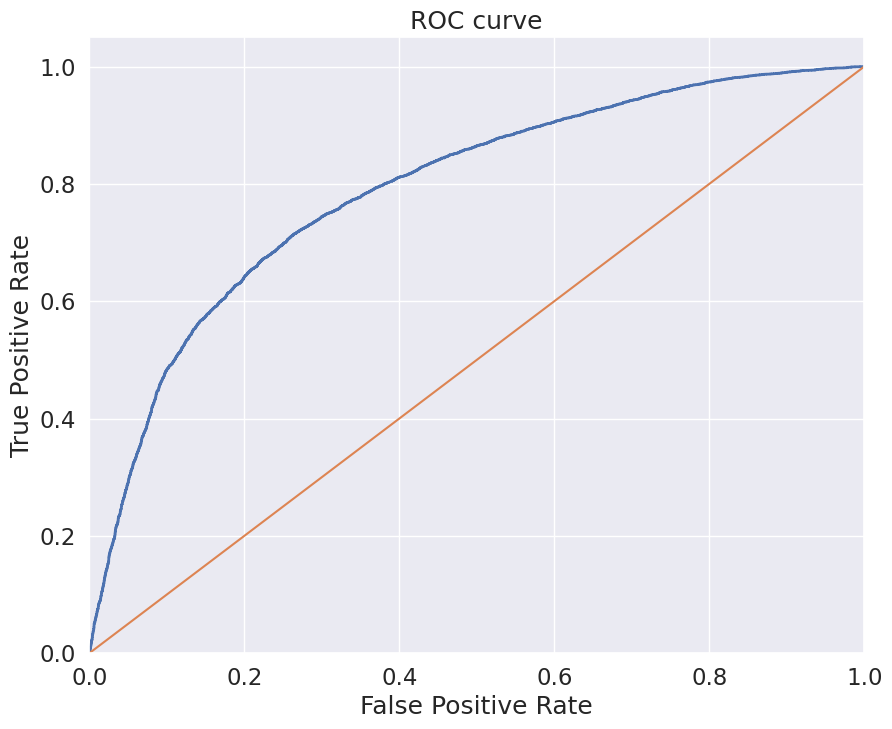


 ************************************************** 

ROC_AUC score train: 0.8237400270124426
ROC_AUC score test: 0.7903547873898884


In [182]:
catb_metrics = Calc_of_metrics_and_Roc_Auc(model_catb, X_train, X_test, y_train, y_test, y_score_prob_catb, y_score_pred_catb)

## 21 Make a confusion matrix

Confusion matrix, without normalization
[[4921 3843]
 [1444 7292]]


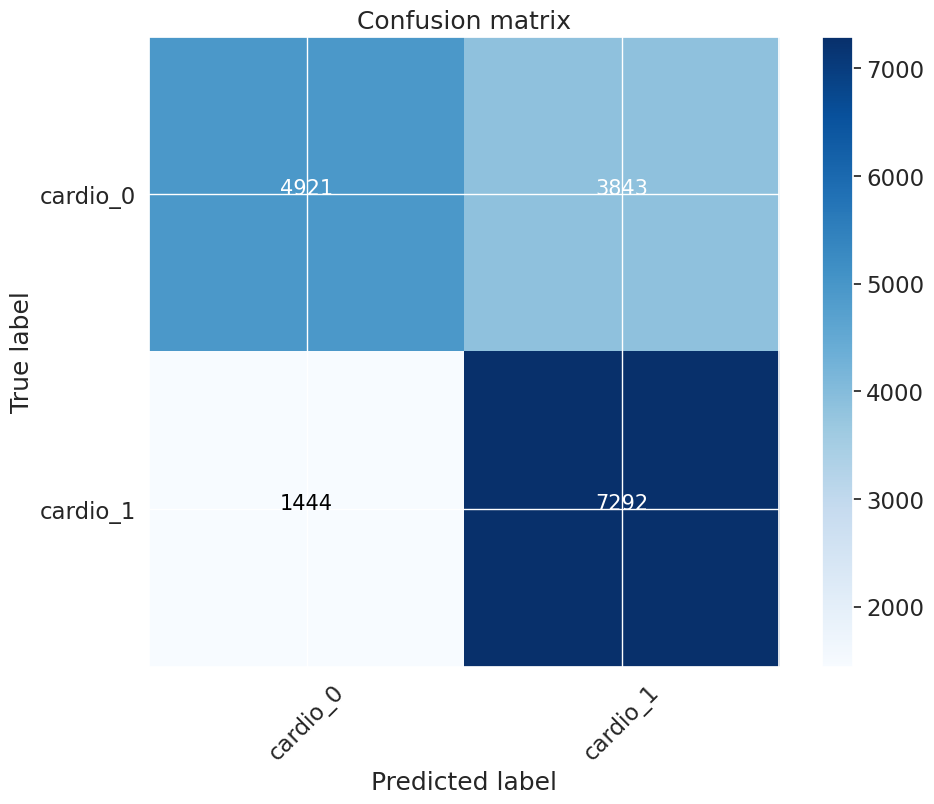

In [183]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_catb = confusion_matrix(y_test, y_score_prob_catb > catb_metrics['Thresholds'])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_catb, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

## 22 Calculate the TPR and FPR

In [184]:
tnfp_dict_catb = TNFP(cnf_matrix_catb)

TPR = 0.8347069597069597 
FPR = 0.43849840255591055 
TNR = 0.5615015974440895


## 23 Cost estimation

In [185]:
Estimation_cost(cnf_matrix_catb, tnfp_dict_catb)

Расходы, если не делать тест и ждать симптомов: 174720000

**************************************************

Расходы, если делать тест всем и лечить группу большых: 155540000

**************************************************

Расходы, если использовать МЛ: 153849000

**************************************************

Расходы "решение не делать тесты - расходы с МL:" 20871000

**************************************************

Расходы "решение не делать тесты - расходы сделать тесты всем": 19180000

**************************************************

Расходы "сделать тесты всем - решение делать тесты ML": 1691000


## 24 Definition of best cost

расходы, если использовать МЛ: 153608200

**************************************************



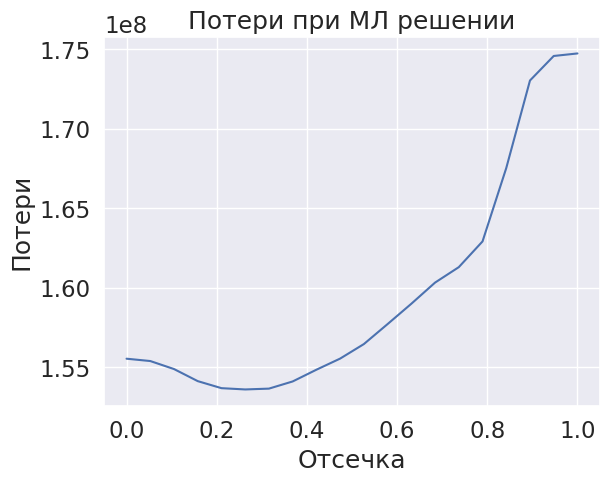


**************************************************

уровень порога по бизнес метрике 0.2631578947368421
уровень порога по f1 метрике 0.34960512744281946


In [212]:
busines_tr_catb, cost_catb = business_threshold_calibrate(y_test, y_score_prob_catb,
                                          catb_metrics['Thresholds'],
                                          rubl_test=1400,
                                          rubl_early_treatment=15000,
                                          rubl_late_treatment=20000)

print(star("*"))
print('уровень порога по бизнес метрике', busines_tr_catb)
print('уровень порога по f1 метрике', catb_metrics['Thresholds'])

# VI RandomForests

## 25 Build Forest model


In [187]:
model_rfc, y_score_prob_rfc, y_score_pred_rfc = build_and_learning_model(('features', feats), ('RFC', RandomForestClassifier(n_estimators=7, max_depth=5, n_jobs=-1, random_state=42)), X_train, X_test, y_train, 5, "roc_auc")

CV score is 0.7839690603577166+-0.002305347047913182


## 26 Calculation of metrics

Best Threshold=0.352, F-Score=0.728, Precision=0.642, Recall=0.839

 ************************************************** 



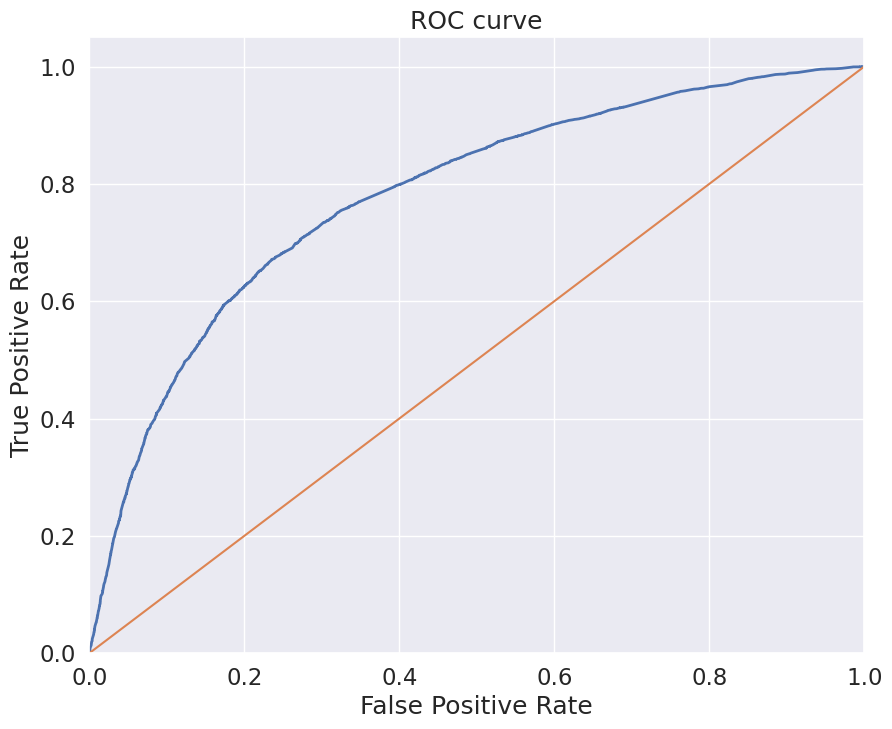


 ************************************************** 

ROC_AUC score train: 0.7872326009242957
ROC_AUC score test: 0.7802222618587864


In [188]:
rfc_metrics = Calc_of_metrics_and_Roc_Auc(model_rfc, X_train, X_test, y_train, y_test, y_score_prob_rfc, y_score_pred_rfc)

## 27 Make a confusion matrix

Confusion matrix, without normalization
[[4684 4080]
 [1414 7322]]


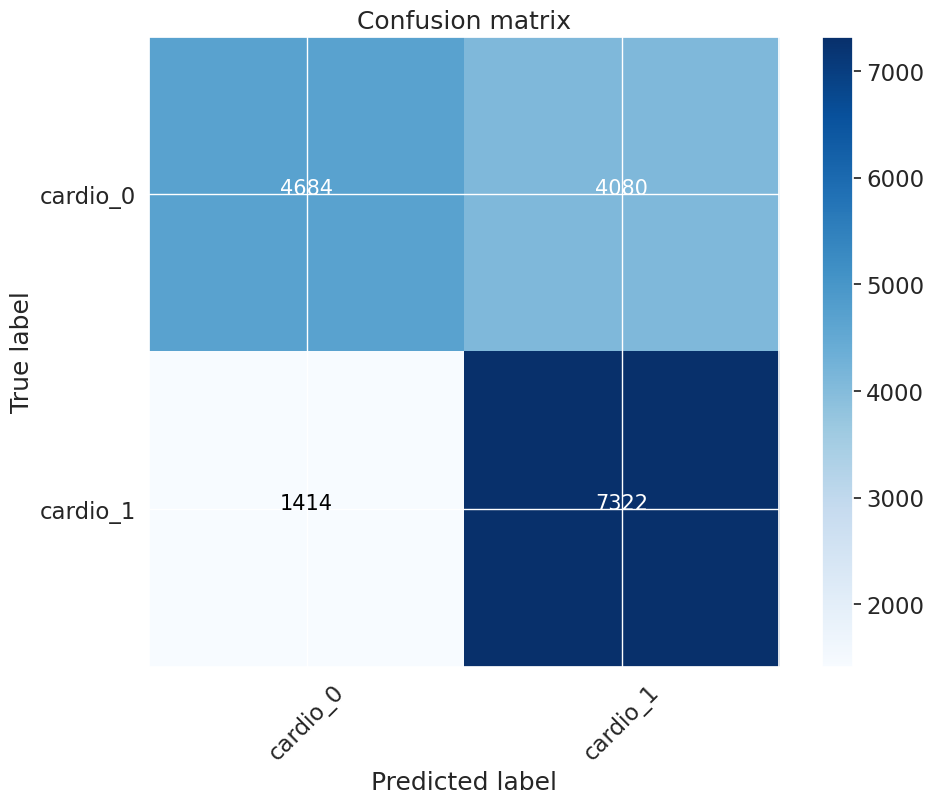

In [189]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_rfc = confusion_matrix(y_test, y_score_prob_rfc > rfc_metrics['Thresholds'])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_rfc, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

## 28 Calculate the TPR and FPR

In [190]:
tnfp_dict_rfc = TNFP(cnf_matrix_rfc)

TPR = 0.8381410256410257 
FPR = 0.4655408489274304 
TNR = 0.5344591510725696


## 29 Cost estimation

In [191]:
Estimation_cost(cnf_matrix_rfc, tnfp_dict_rfc)

Расходы, если не делать тест и ждать симптомов: 174720000

**************************************************

Расходы, если делать тест всем и лечить группу большых: 155540000

**************************************************

Расходы, если использовать МЛ: 154072800

**************************************************

Расходы "решение не делать тесты - расходы с МL:" 20647200

**************************************************

Расходы "решение не делать тесты - расходы сделать тесты всем": 19180000

**************************************************

Расходы "сделать тесты всем - решение делать тесты ML": 1467200


## 30 Definition of best cost

расходы, если использовать МЛ: 153775800

**************************************************



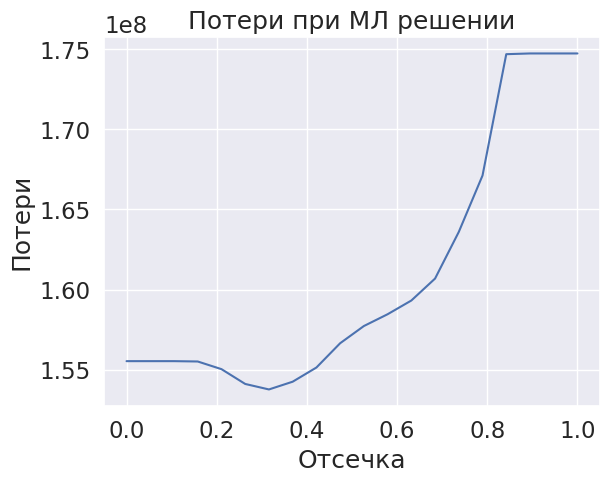


**************************************************

уровень порога по бизнес метрике 0.3157894736842105
уровень порога по f1 метрике 0.3516210052175838


In [213]:
busines_tr_rfc, cost_rfc = business_threshold_calibrate(y_test, y_score_prob_rfc,
                                          rfc_metrics['Thresholds'],
                                          rubl_test=1400,
                                          rubl_early_treatment=15000,
                                          rubl_late_treatment=20000)

print(star("*"))
print('уровень порога по бизнес метрике', busines_tr_rfc)
print('уровень порога по f1 метрике', rfc_metrics['Thresholds'])

# Definition best model

In [219]:
df_metrics = pd.DataFrame([logreg_metrics, xgb_metrics, catb_metrics, rfc_metrics])
df_metrics.insert(1, "busines_tr", [busines_tr_logreg, busines_tr_xgb, busines_tr_catb, busines_tr_rfc])
df_metrics["busines_cost"] = [cost_logreg, cost_xgb, cost_catb, cost_rfc]
df_metrics["model"] = ["logreg", "xgb", "catb", "rfc"]
df_metrics

,Thresholds,busines_tr,F_score,Precision,Recall,busines_cost,model
0,0.397647,0.368421,0.724875,0.633939,0.846268,153787600,logreg
1,0.500106,0.263158,0.712047,0.739339,0.686699,153635400,xgb
2,0.349605,0.263158,0.733998,0.654903,0.834821,153608200,catb
3,0.351621,0.315789,0.727580,0.642250,0.839057,153775800,rfc


In [220]:
df_metrics[df_metrics["busines_cost"] == df_metrics["busines_cost"].min()]

,Thresholds,busines_tr,F_score,Precision,Recall,busines_cost,model
2,0.349605,0.263158,0.733998,0.654903,0.834821,153608200,catb


# Conclusion

По итогам тестирования 4-х моделей LogisticRegression, XGBClassifier, CatBoostClassifier и RandomForestClassifier наилудчшей показала себя модель CatBoostClassifier с минимальным показателем потерь стоимости по бизнес-метрике.
Затраты по бизнес-метрике: 153608200